## Project: Predicting House Prices (Kaggle Data Science)

#### Foreword
I am currently a three-month-long Data Science learner on Codecademy who just finished its Supervised Machine Learning course. Although this off-platform project is note required, I decided to challenge myself by participating in this competition. 

#### About the competition and my project
According to Kaggle, this competittion is about predicting the final price of each house (1459) based on 79 features of residential homes in Ames, Iowa. In this project, I aim to build several models using `RandomForestRegressor`, `LinearRegression`, `SVR` and `Ridge` to predict data. Also, I will try using some model selection algorithms to facilitate my process including `GridSearchCV`.

#### Acknowledgement
By working on this project, I've obtained an immense amount of knowledge regarding data preprocessing and building regression models. I would like to express my gratitude to the other participants who publicly shared their codes, thanks to which, I could improve my models and achieved a better result than I expected. 

Hats off to Justin Nguyen, Pedro Marcelino and Hoang Pham Viet. Thanks a lot, guys.

In [1]:
## import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
pd.options.display.max_columns = 81

In [2]:
## load data into panda dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

The training dataset includes 1460 records, 79 features, 1 target varibale and 1459 records and the testing dataset contains 1459 records, 79 predictor variables. Also, this dataset contains a mixture of different data types: numerical, nomial and ordinal. To be honest, I was overwhelmed at first by the huge number of features in these datasets.

### Part 1: Exploratory Data Analysis

#### Missing Values

In [4]:
## create a dataframe for missing values
total_null = train_df.isna().sum().sort_values(ascending=False)
pct_null = (train_df.isna().sum()/train_df.isna().count()).sort_values(ascending=False)
total_null = pd.concat([total_null, pct_null], axis=1, keys=['Total', 'Percentage'])

total_null.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


`PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu` and `LotFrontage` are the features whose lots of missing values in this dataset, followed by some Garage and Basement features whose 2-5% of the data is NaN. The rule of thumb is that if more than 15% of the data is missing, we'd better delete the corresponding variable since it is almost impossible for us to decide on what we should replace them with without messing up with the data.

As for the other numerical and categorical variables, I decided to replace them with their corresponding means and the most frequent values respectively.

In [5]:
## drop NaN values 
train_df = train_df.drop((total_null[total_null['Percentage'] > 0.15]).index,1)

In [6]:
num_cols = train_df.select_dtypes([np.number]).columns
cat_cols = train_df.select_dtypes(['object', 'bool']).columns

## replace NaN values with mean - numerical variables
train_df[num_cols] = train_df[num_cols].apply(lambda x: x.fillna(x.mean()))

## replace Nan values with most frequent values
train_df[cat_cols] = train_df[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [7]:
train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#### Distribution of Sale Prices

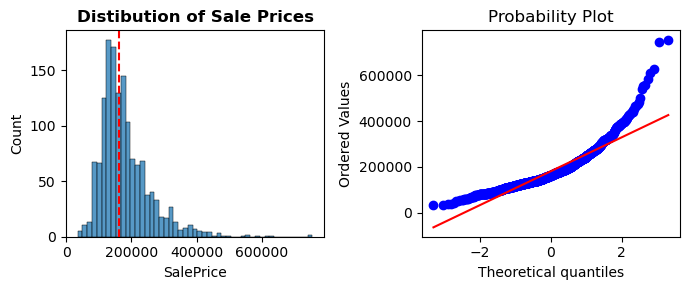

In [8]:
## plot a histogram for the distribution of Sale Prices
fig, axs = plt.subplots(figsize=(7,3), dpi=100)

plt.subplot(1,2,1)
sns.histplot(train_df['SalePrice']).set_title('Distibution of Sale Prices', weight='bold')
plt.axvline(train_df['SalePrice'].median(), color='red', linestyle='dashed')

plt.subplot(1,2,2)
stats.probplot(train_df['SalePrice'], plot=plt)
plt.tight_layout()

As seen on the two charts above, the distribution of sale prices is right-skewed, which means there are outliers that can affect our Regression models later on. Yet, this is a simple matter to deal with using log transformation. Also, performing Log transformation on target data also helps improve the accuracy of the regression models.

In [9]:
## log-transform SalePrice data
train_df.SalePrice = np.log(train_df.SalePrice)

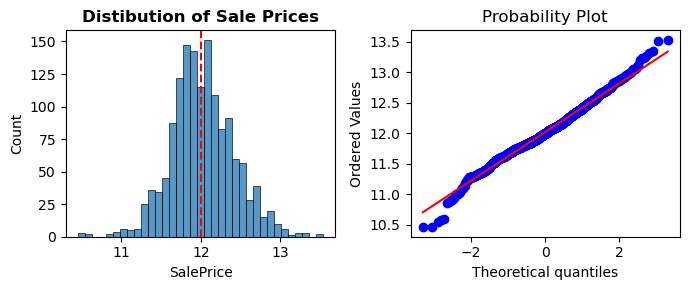

In [10]:
## check the distribution and probability plot again
fig, axs = plt.subplots(figsize=(7,3), dpi=100)

plt.subplot(1,2,1)
sns.histplot(train_df['SalePrice']).set_title('Distibution of Sale Prices', weight='bold')
plt.axvline(train_df['SalePrice'].median(), color='red', linestyle='dashed')

plt.subplot(1,2,2)
stats.probplot(train_df['SalePrice'], plot=plt)
plt.tight_layout()

Now, the `SalePrice` data is more normality distributed. We can go on to explore the predictor variables. Next, I will look into the relationships between target variable `SalePrice` and features. It would be more efficient and accurate if I used some feature selection algorithms. However, I decided to manually choose them to simplify my code (and also because my lack of more advanced knowledge).

#### Numerical variables

In this part, I will explore the relationships between different some numerical features *(yet, I later discovered that some of them are actually ordinal variables, which were already encodedand)* and target variable to select the most relevant ones for our models.

<AxesSubplot:>

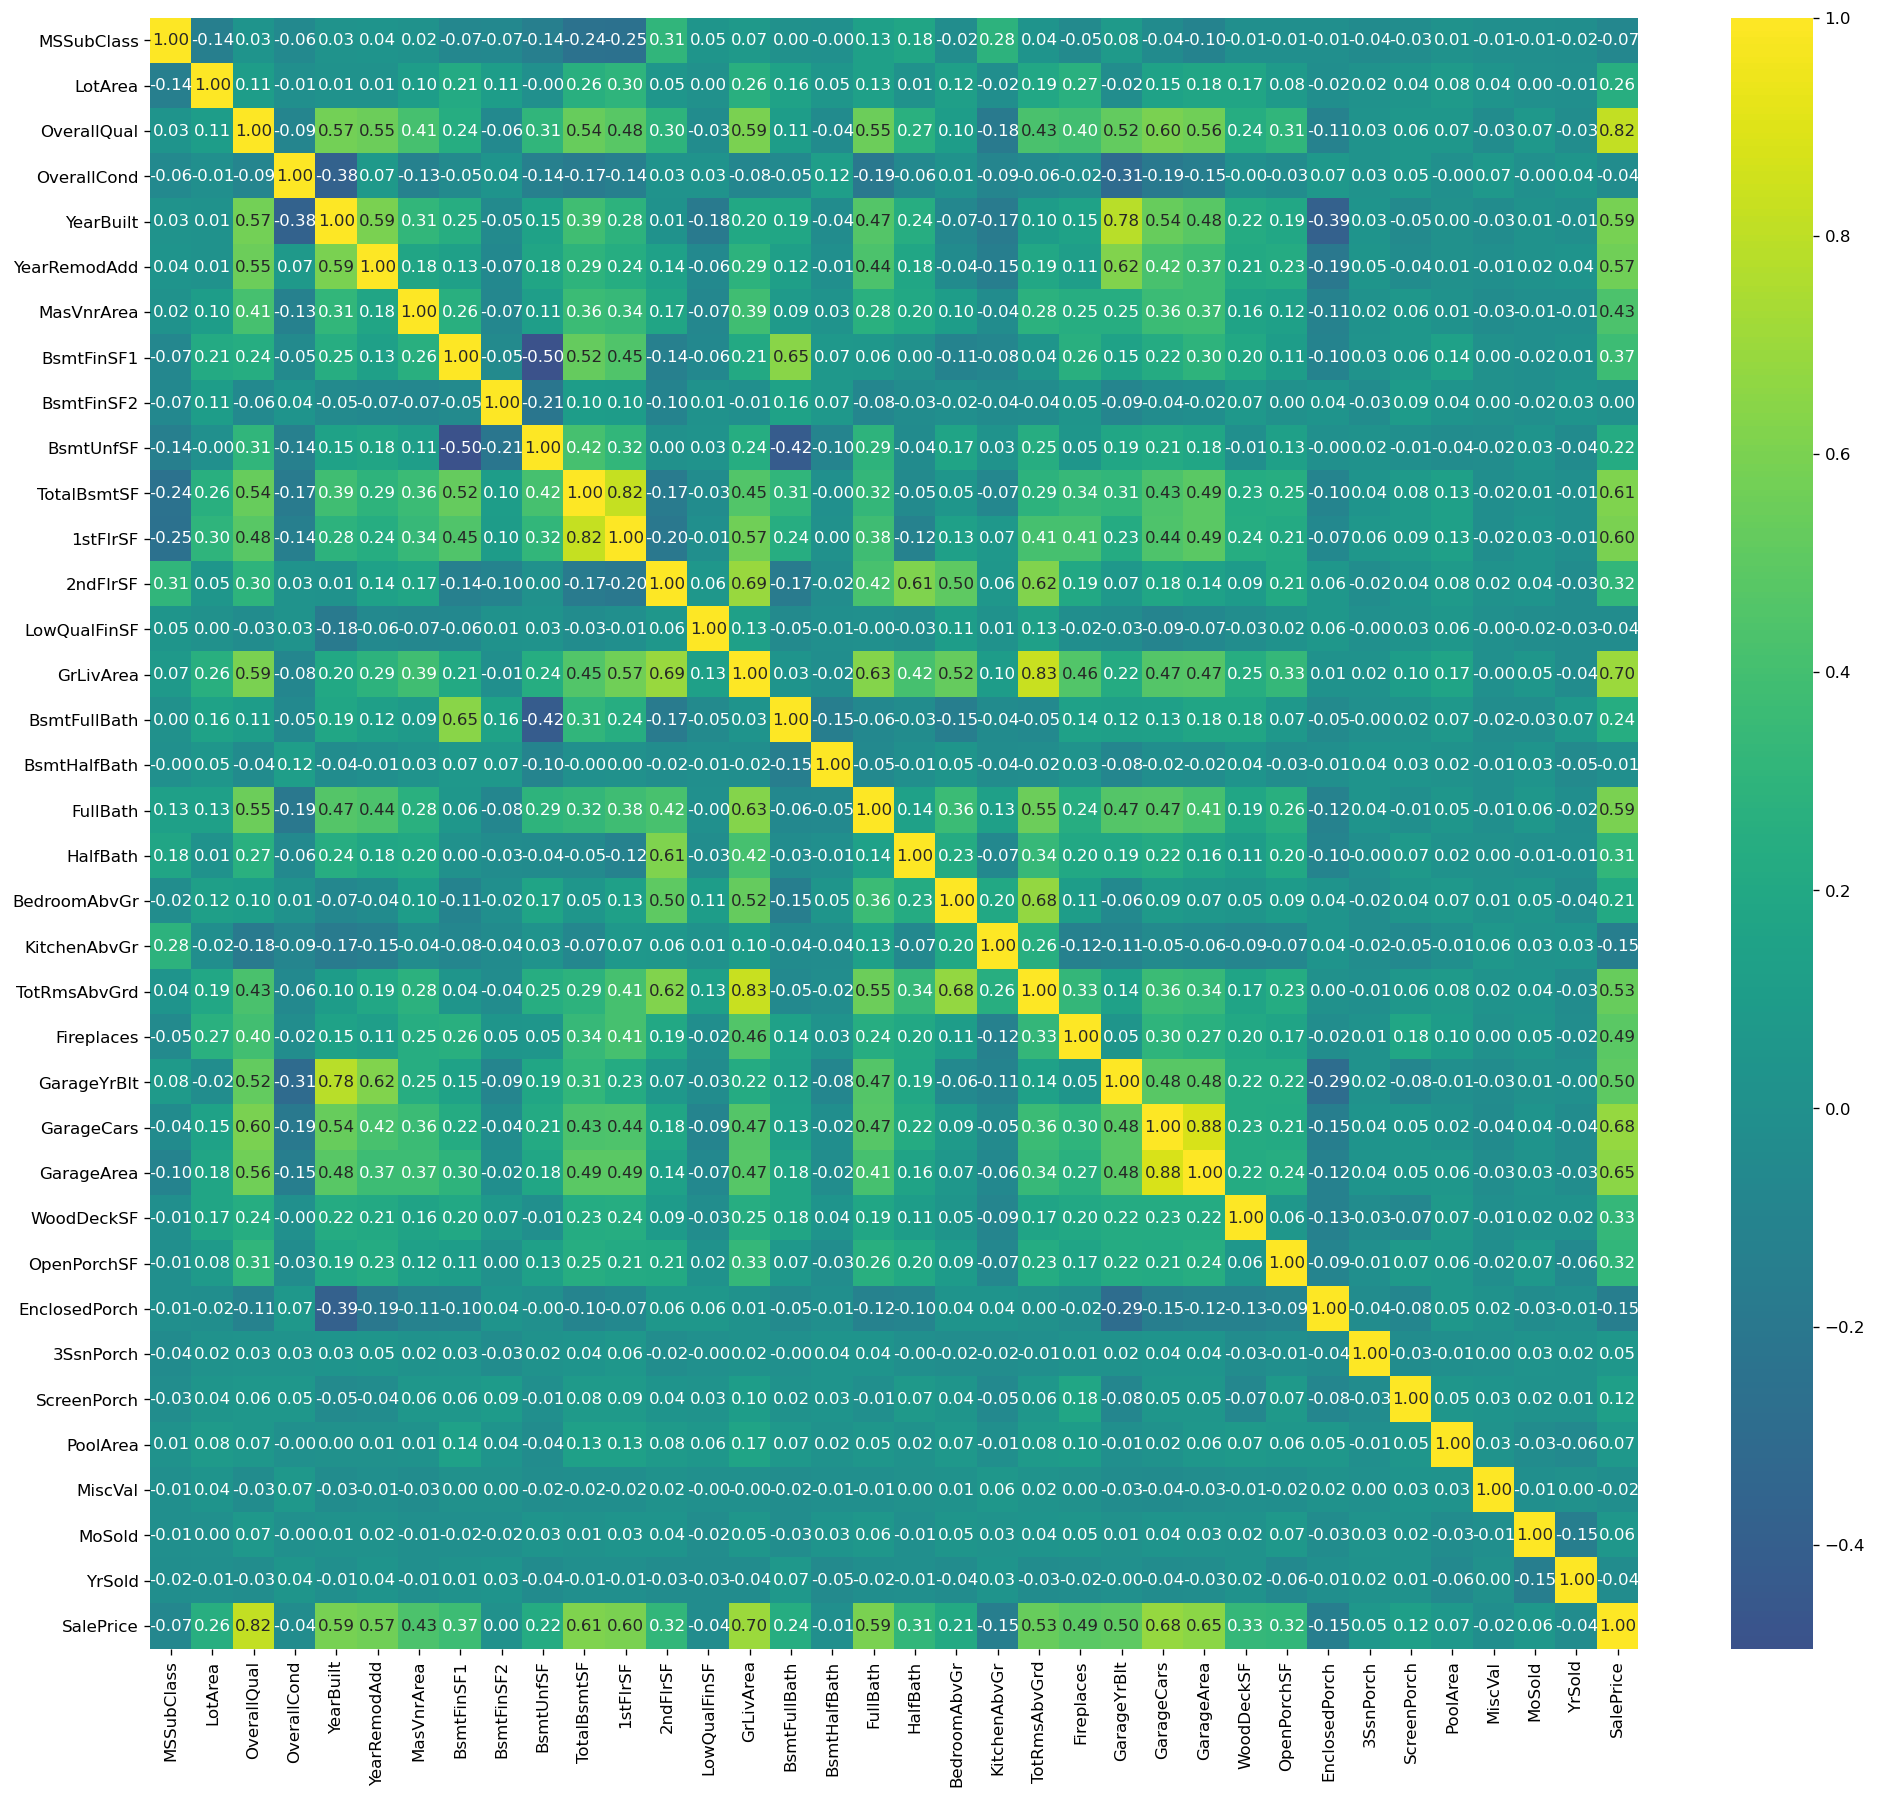

In [11]:
## plot a heatmap of correlation
corr_grid = train_df.drop(['Id'], axis=1).corr()

plt.figure(figsize=(20,18), dpi=120)
sns.heatmap(
    corr_grid, center=0, cmap='viridis',
    annot=True, fmt='.2f',
    xticklabels=corr_grid.columns, yticklabels=corr_grid.columns
)

<AxesSubplot:>

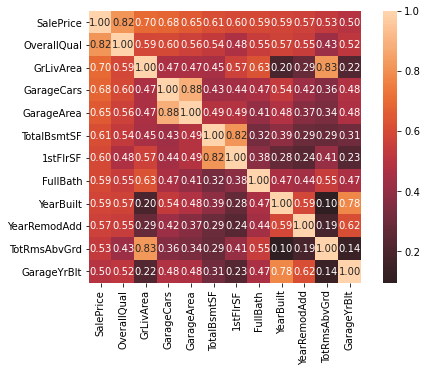

In [12]:
## create another corr grid for variables with high correlation
model_cols = corr_grid.nlargest(12, 'SalePrice')['SalePrice'].index
corr = train_df[model_cols.tolist()].corr()

## plot a heatmap 
plt.figure(figsize=(8,5))
sns.heatmap(
    corr, center=0, annot=True, fmt='.2f', square=True,
    xticklabels=True, yticklabels=True
)

##### Observations: 
1. `OveralQual` and `GrLivArea` seem to have strong correlation with `SalePrice`.
2. `GarageCars` - `GarageArea` are highly correlated with each other (coefficient is 0.88), which is understandable since these features belong to the same thing. Similarly, `TotalBsmtSF` and `1stFlrSF` are also correlated (coefficient is 0.82). `GrLivArea` and `TotRmsAbvGrd` are also highly correlated. 
3. As for the rest, there seems to be some collinearity. Yet, the coefficients are all lower than 0.7 (the rule of thumb), so I will not do anything with them. 

#### Closer look at the chosen numerical features

In [13]:
## create a list of only chosen columns
numeric_cols = [
    'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
]

Now, in order to check the relationship between these features and sale prices, I will plot several scatter plots to visualize them. 

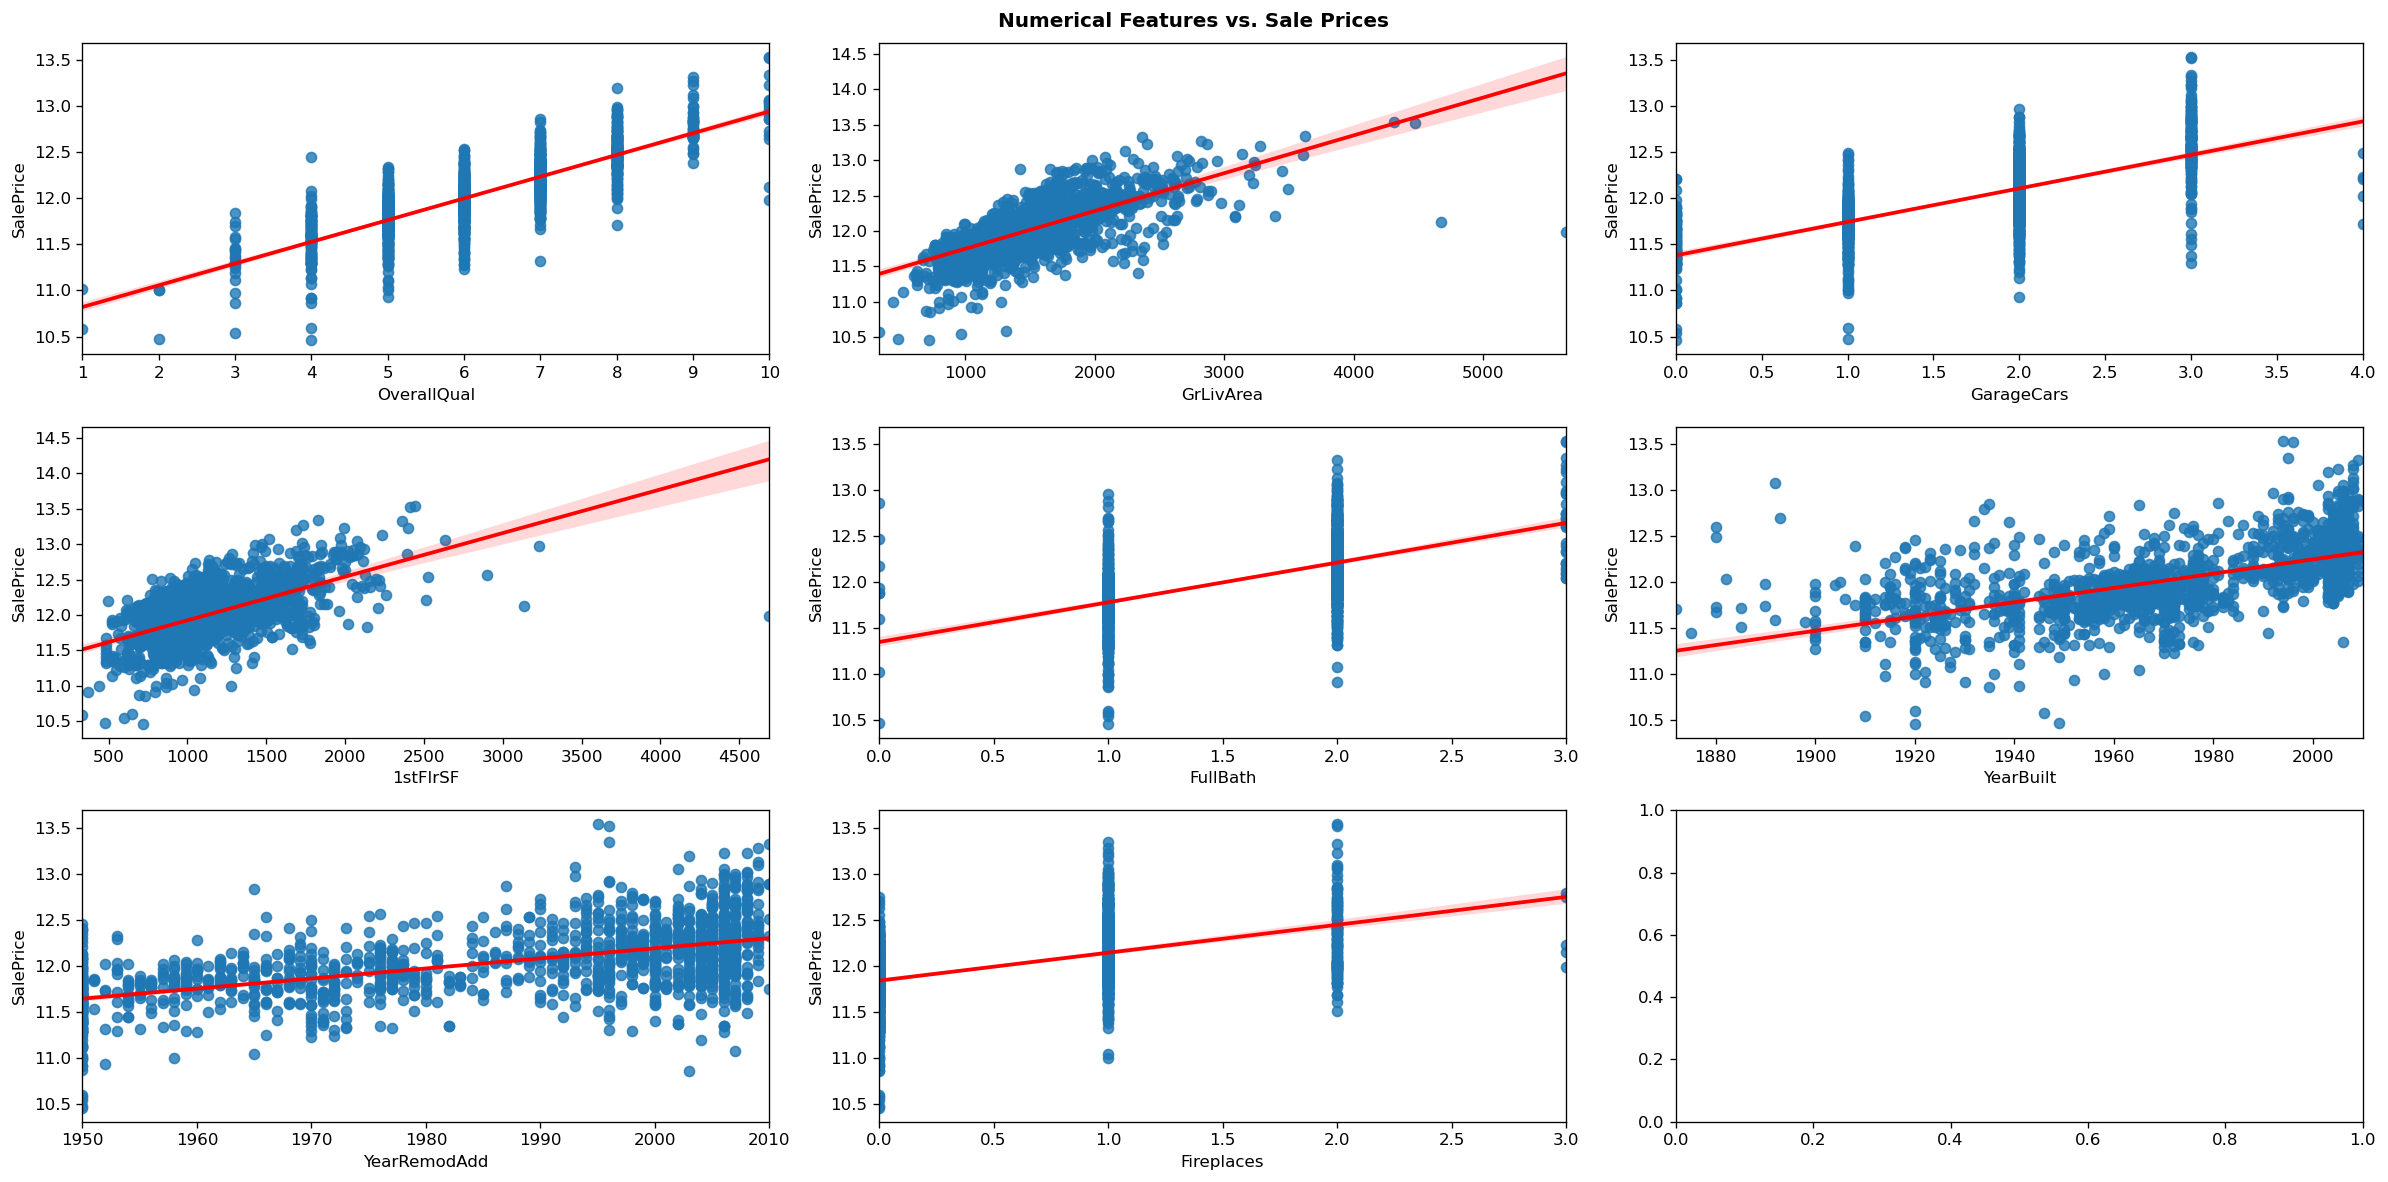

In [14]:
## plot multiple scatter plots 
fig, axs = plt.subplots(ncols= 3, nrows=3, figsize=(20,10), dpi=120)
for feature, ax in zip(numeric_cols, axs.flatten()):
    sns.regplot(x=feature, y='SalePrice', data=train_df, ax=ax, line_kws={'color':'red'})
plt.suptitle('Numerical Features vs. Sale Prices', weight='bold')
plt.tight_layout()

For now, we have a handful of numerical predictor variables including `OverallQual` , `GrLivArea`, `GarageCars`, `1stFlrSF`, `FullBath`, `YearBuilt`, `YearRemodAdd` and `Fireplaces`. 

#### Categorical features

In order to encode these features correctly, I will divide them into ordinal and nomial data.
##### Ordinal variables:
`ExterQual`, `ExterCond`, `HeatingQC` and `KitchenQual`

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Now I will encode them accordingly.

In [15]:
## transform the ordinal variables 
categories={'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
ordinal_cols = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for feature in ordinal_cols:
    train_df[feature] = train_df[feature].map(categories)

train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


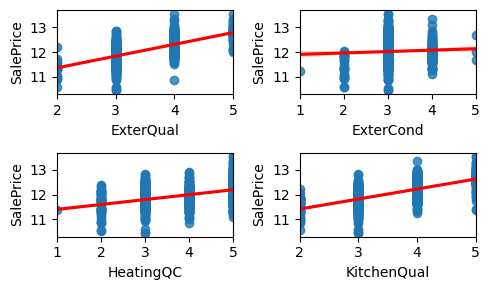

In [16]:
fig, axs = plt.subplots(ncols= 2, nrows=2, figsize=(5,3), dpi=100)
for feature, ax in zip(ordinal_cols, axs.flatten()):
    sns.regplot(x=feature, y='SalePrice', data=train_df, ax=ax, line_kws={'color':'red'})
plt.tight_layout()

Except for `ExterCond`, the other three ordinal variables seem to be strong predictors of sale prices.

In [17]:
## replace ordinal_cols list with only chosen variables
ordinal_cols = ['ExterQual', 'HeatingQC', 'KitchenQual']

##### Nomial variables

In [18]:
nomial_features = train_df.select_dtypes(include=['object', 'bool']).columns.tolist()

## LabelEncode categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in nomial_features:
    train_df[feature] = encoder.fit_transform(train_df[feature])

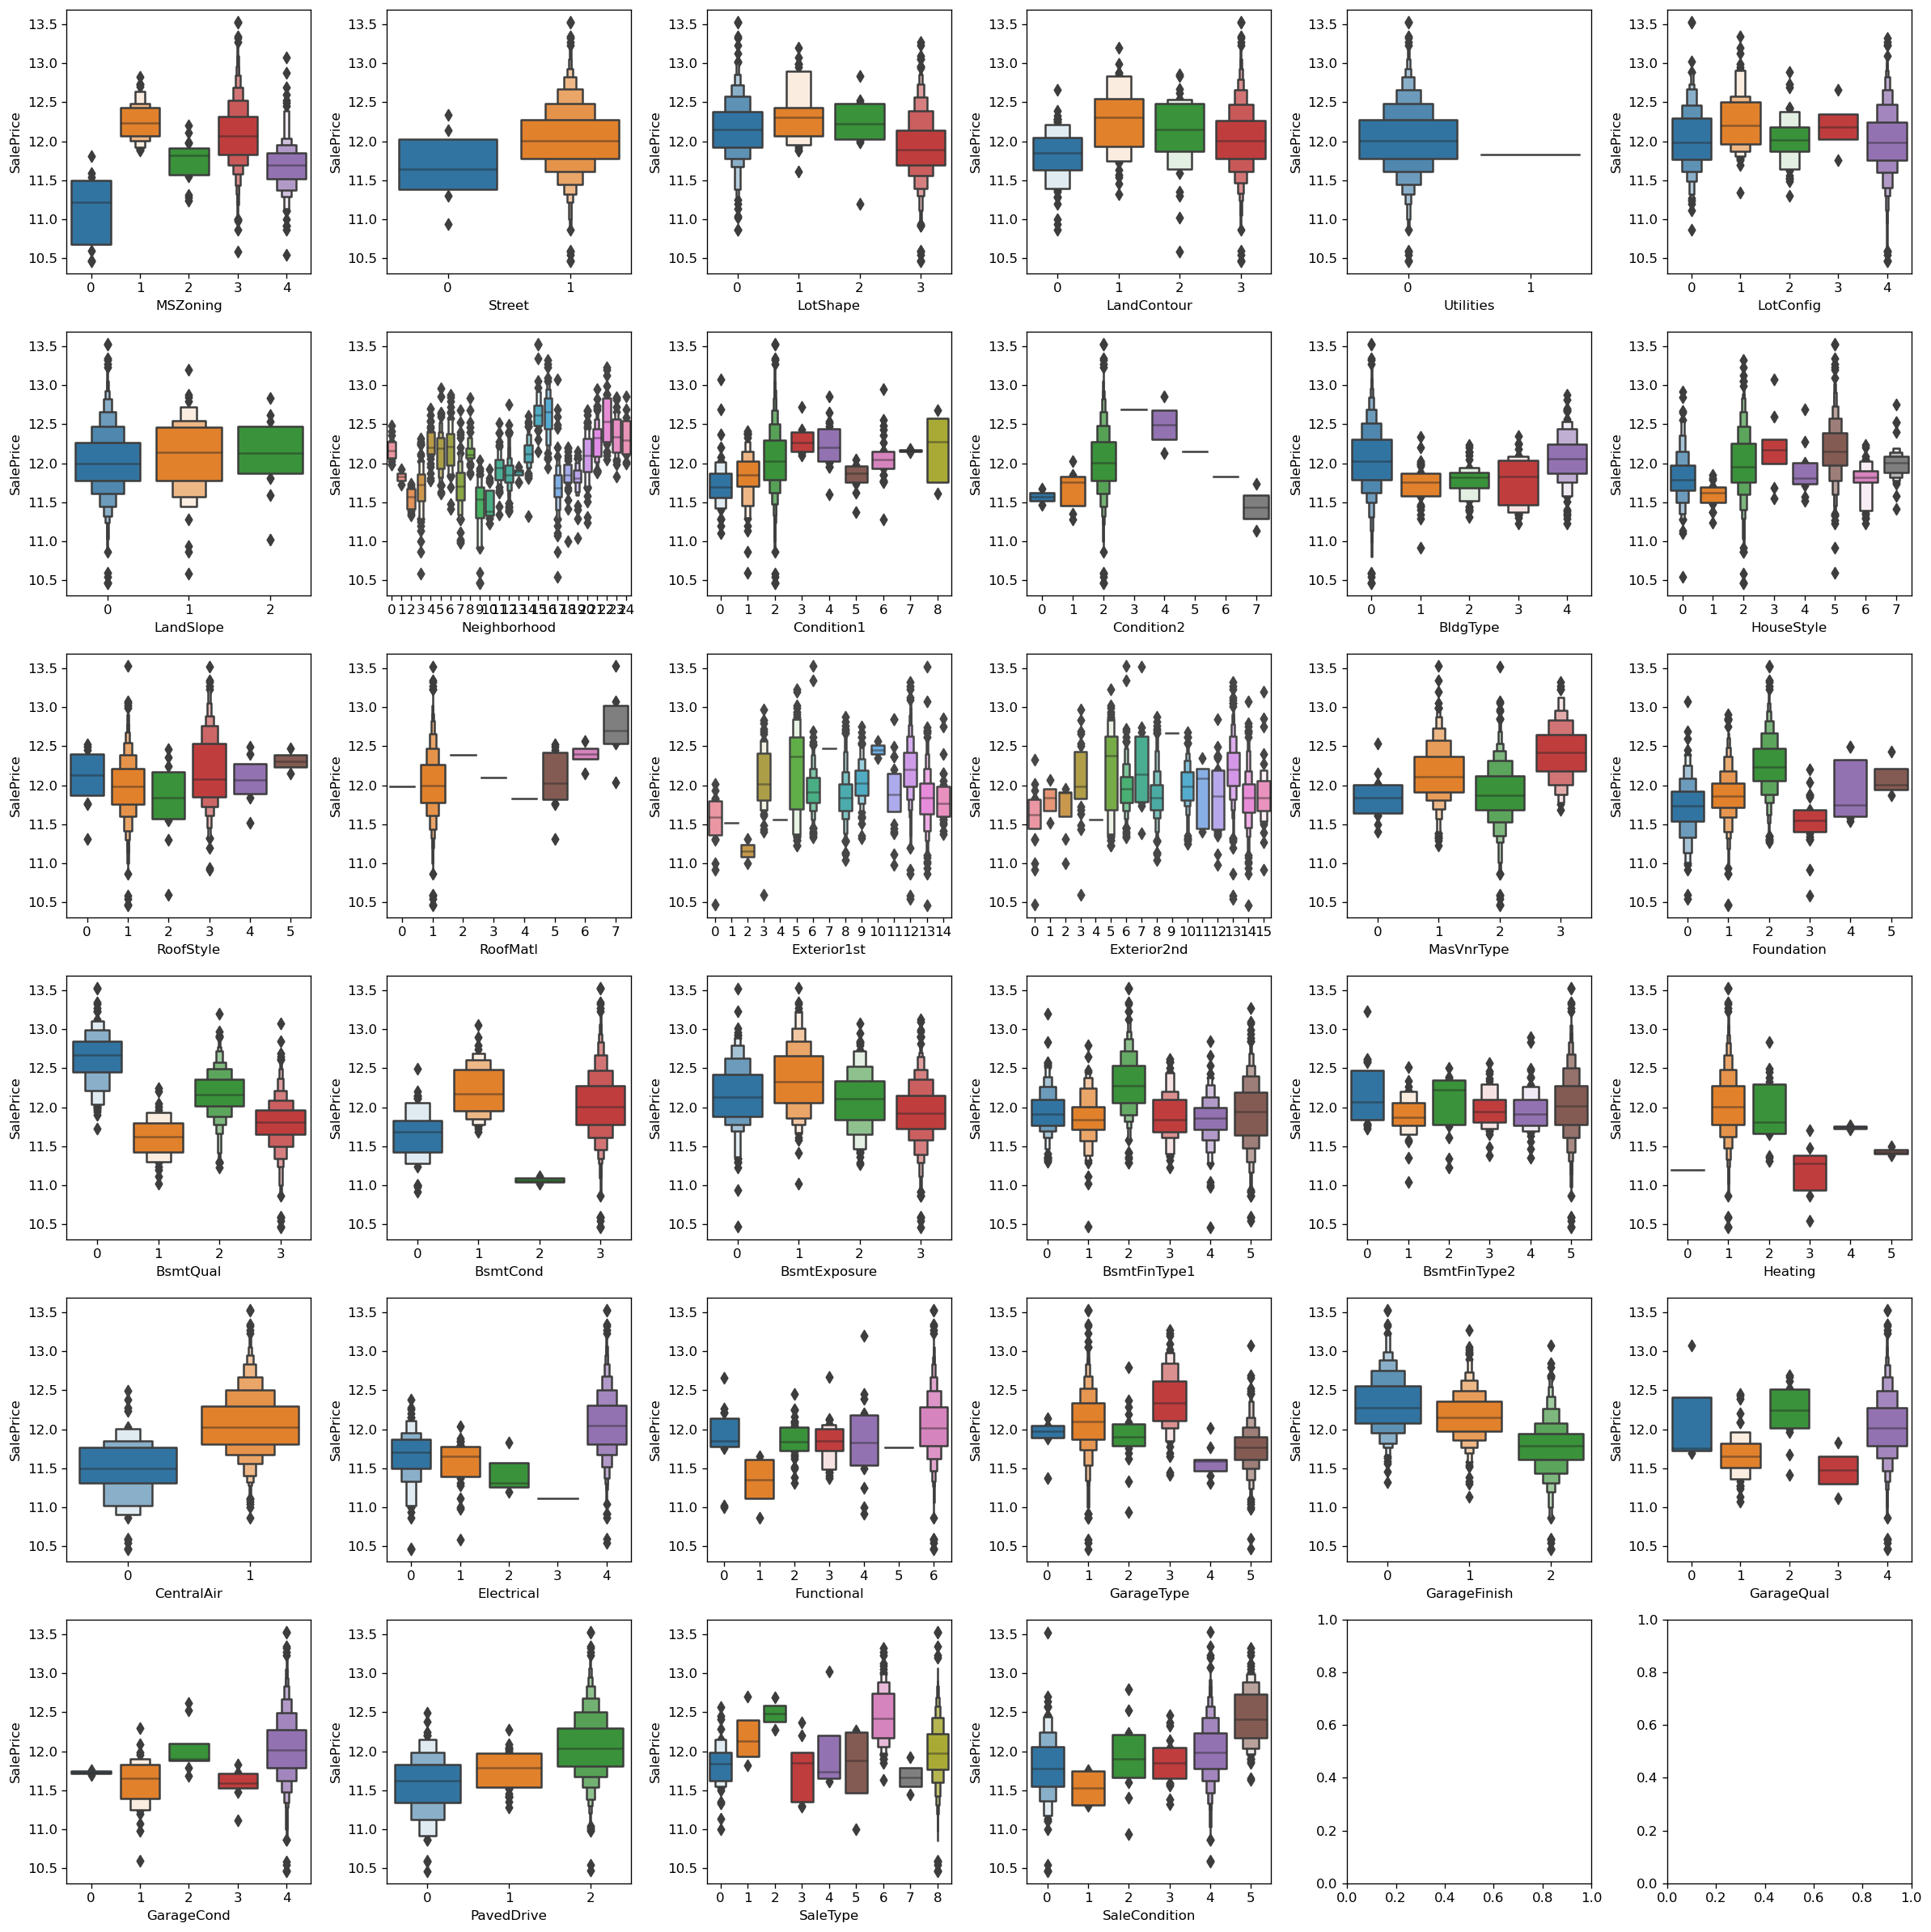

In [19]:
## plot box plots
fig, axs = plt.subplots(ncols=6, nrows=6, figsize=(20,20), dpi=120)
for feature, ax in zip(nomial_features, axs.flatten()):
    sns.boxenplot(x=feature, y='SalePrice', data=train_df, ax=ax)
plt.tight_layout()

The correlation between each predictor variable and sale prices is quite weak. However, there are a few features stands out including `CentralAir` and `GarageFinish`. So, I will include these two in my models as well.

In [20]:
nomial_cols = ['CentralAir', 'GarageFinish']

In [21]:
## create a list of chosen variables
chosen_cols = numeric_cols + ordinal_cols + nomial_cols

In [22]:
X = train_df[chosen_cols]
y = train_df.SalePrice
X.head()

,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,ExterQual,HeatingQC,KitchenQual,CentralAir,GarageFinish
0,7,1710,2,856,2,2003,2003,0,4,5,4,1,1
1,6,1262,2,1262,2,1976,1976,1,3,5,3,1,1
2,7,1786,2,920,2,2001,2002,1,4,5,4,1,1
3,7,1717,3,961,1,1915,1970,1,3,4,4,1,2
4,8,2198,3,1145,2,2000,2000,1,4,5,4,1,1


### Part 2: Best Models Search

In [23]:
## import regression algorithms
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
## split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [25]:
## create an empty list contain best estimators
estimators = []

#### Ridge

In [26]:
params = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'tol' : [0.0001, 0.001, 0.01, 0.1],
    'random_state' : [42]
}

ridge  = Ridge()
clf_ridge = GridSearchCV(ridge, param_grid=params, scoring='r2', cv=10, n_jobs=-1)
clf_ridge.fit(X_train, y_train)

print(f'Best parameters: {clf_ridge.best_params_}')
print(f'Best score: {clf_ridge.best_score_}')

estimators.append(['Ridge', clf_ridge.best_estimator_])

Best parameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'random_state': 42, 'solver': 'lsqr', 'tol': 0.01}
Best score: 0.8483936755202807


#### Linear Regression

In [27]:
params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'positive': [True, False]
}

ols = LinearRegression()
clf_ols = GridSearchCV(ols, param_grid=params, scoring='r2', cv=10, n_jobs=-1)
clf_ols.fit(X_train, y_train)

print(f'Best parameters: {clf_ols.best_params_}')
print(f'Best score: {clf_ols.best_score_}')

estimators.append(['OLS', clf_ols.best_estimator_])

Best parameters: {'fit_intercept': True, 'normalize': True, 'positive': False}
Best score: 0.8481511750524422


#### KNeighbors Regression

In [28]:
params = {
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

kneighbors = KNeighborsRegressor()
clf_kneigbors = GridSearchCV(kneighbors, param_grid=params, scoring='r2', cv=10, n_jobs=-1)
clf_kneigbors.fit(X_train, y_train)

print(f'Best parameters: {clf_kneigbors.best_params_}')
print(f'Best score: {clf_kneigbors.best_score_}')

estimators.append(['KNeighbors', clf_kneigbors.best_estimator_])

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 13, 'weights': 'distance'}
Best score: 0.7315401434808485


#### Random Forest Regression

In [29]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 30, 50],
    'max_features': [2, 3],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5]
}

regr = RandomForestRegressor()
clf_regr = GridSearchCV(regr, param_grid=params, scoring='r2', cv=10, n_jobs=-1)
clf_regr.fit(X_train, y_train)

print(f'Best parameters: {clf_regr.best_params_}')
print(f'Best score: {clf_regr.best_score_}')

estimators.append(['REGR', clf_regr.best_estimator_])

Best parameters: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best score: 0.8520860482093366


### Part 3: Model Selection

In this part, I will compare the performances of the models based RSME. The best model is the one with lowest RSME. To compare them, I will perform `cross_val_score` using the original predictor values and sale prices. Most may perform cross validation on training data only. Yet, I think this approach can be erronous. 

In [30]:
## import Pipeline and StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## create a list of pipelines contaning all model
pipes = []
for name, model in estimators:
    pipe = Pipeline(steps=[('scaler', StandardScaler()), (name, model)])
    pipes.append([name, pipe])

In [31]:
## perform cross validation using `cross_val_score`
scores_df = {'Model':[], 'RMSE':[]}
for name, pipe in pipes:
    rmses = -cross_val_score(pipe, X, y, scoring='neg_root_mean_squared_error', cv=10, n_jobs=--1)
    scores_df['Model'].append(name)
    scores_df['RMSE'].append(rmses.mean())

scores_df = pd.DataFrame(scores_df)
scores_df

,Model,RMSE
0,Ridge,0.162203
1,OLS,0.161955
2,KNeighbors,0.166841
3,REGR,0.152916


Based on the average RMSE from cross validation, we can see that the model using Random Forest Regression algorithm performed the best.

In [41]:
## pick only the RandomForestRegressor from pipes and fit it to training data
regr_final = pipes[3][1]
regr_final.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('REGR',
                 RandomForestRegressor(max_depth=10, max_features=3,
                                       min_samples_leaf=3, min_samples_split=8,
                                       n_estimators=200))])

In [42]:
print(f"Training data R2 score: {regr_final.score(X_train, y_train)}")
print(f"Testing data R2 score: {regr_final.score(X_test, y_test)}")

Training data R2 score: 0.9121640436261705
Testing data R2 score: 0.8601743728224693


### Part 4: Sale Prices Prediction

In [34]:
## print the first 5 rows of test_df
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Missing values

In [35]:
## create a dataframe for missing values
total_null_2 = test_df.isna().sum().sort_values(ascending=False)
pct_null_2 = (test_df.isna().sum()/test_df.isna().count()).sort_values(ascending=False)
total_null_2 = pd.concat([total_null_2, pct_null_2], axis=1, keys=['Total', 'Percentage'])

total_null_2.head(20)

,Total,Percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [36]:
## drop NaN values 
test_df = test_df.drop((total_null_2[total_null_2['Percentage'] > 0.15]).index,1)
test_df.shape

(1459, 74)

In [37]:
num_cols = test_df.select_dtypes([np.number]).columns
cat_cols = test_df.select_dtypes(['object']).columns

## replace NaN values with median - numerical variables
test_df[num_cols] = test_df[num_cols].apply(lambda x: x.fillna(x.median()))

## replace Nan values with most frequent values
test_df[cat_cols] = test_df[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

#### Encode ordinal variables

In [38]:
## transform the ordinal predictor variables 
categories={'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
ordinal_cols_2 = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for feature in ordinal_cols:
    test_df[feature] = test_df[feature].map(categories)

#### Encode nomial variables

In [39]:
nomial_features_2 = test_df.select_dtypes(include=['object', 'bool']).columns.tolist()

## LabelEncode categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in nomial_features_2:
    test_df[feature] = encoder.fit_transform(test_df[feature])

#### Predict sale prices

In [40]:
predictors = test_df[chosen_cols]
prices_predicted = regr_final.predict(predictors)
prices_predicted_df = pd.DataFrame({'Id':test_df.Id, 'SalePrice':np.expm1(prices_predicted)})
prices_predicted_df.to_csv('Submission.csv', index=False)